In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Dataset .csv")   # 👈 use exact filename (with space if present)

print("✅ Dataset loaded successfully!")
df.head()

✅ Dataset loaded successfully!


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Correlation Matrix:
                      Restaurant ID  Country Code  Longitude  Latitude  \
Restaurant ID              1.000000      0.148471  -0.226081 -0.052081   
Country Code               0.148471      1.000000  -0.698299  0.019792   
Longitude                 -0.226081     -0.698299   1.000000  0.043207   
Latitude                  -0.052081      0.019792   0.043207  1.000000   
Average Cost for two      -0.001693      0.043225   0.045891 -0.111088   
Price range               -0.134540      0.243327  -0.078939 -0.166688   
Aggregate rating          -0.326212      0.282189  -0.116818  0.000516   
Votes                     -0.147023      0.154530  -0.085101 -0.022962   

                      Average Cost for two  Price range  Aggregate rating  \
Restaurant ID                    -0.001693    -0.134540         -0.326212   
Country Code                      0.043225     0.243327          0.282189   
Longitude                         0.045891    -0.078939         -0.116818   
Latit

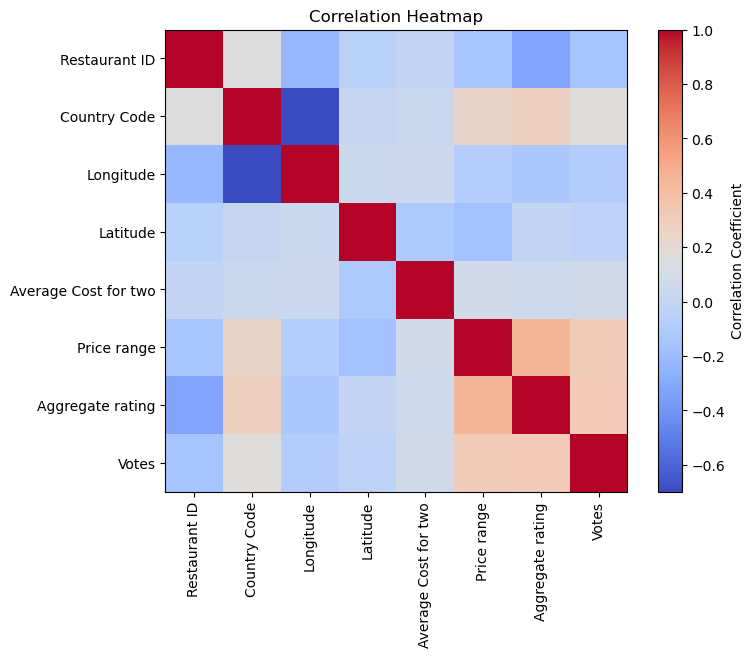

In [2]:
# Correlation between numerical columns
corr = df.corr(numeric_only=True)

print("Correlation Matrix:")
print(corr)

# Heatmap (simple using matplotlib)
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar(label="Correlation Coefficient")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()

Ratings Distribution (for popularity check):
Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     498
3.5     480
3.6     458
3.7     427
3.8     400
3.9     335
4.0     266
4.1     274
4.2     221
4.3     174
4.4     144
4.5      95
4.6      78
4.7      42
4.8      25
4.9      61
Name: count, dtype: int64


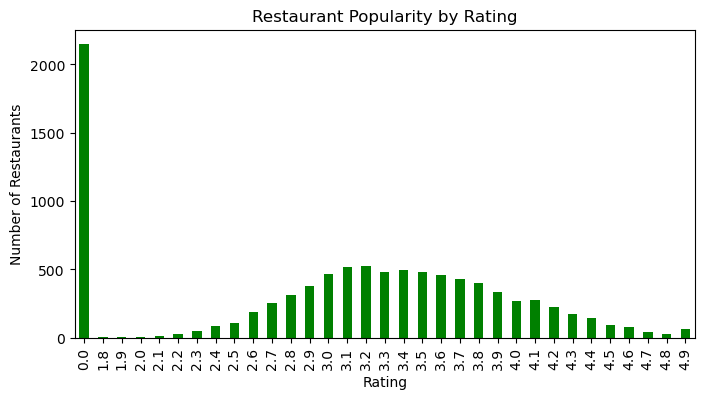

In [3]:
# Distribution of ratings
rating_counts = df['Aggregate rating'].value_counts().sort_index()

print("Ratings Distribution (for popularity check):")
print(rating_counts)

# Bar chart
plt.figure(figsize=(8,4))
rating_counts.plot(kind='bar', color='green')
plt.title("Restaurant Popularity by Rating")
plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")
plt.show()

Top 10 Countries by Restaurant Count:
Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64


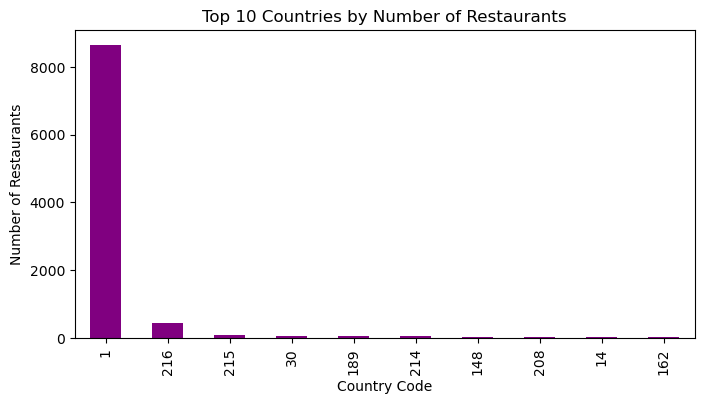


Top 10 Countries by Average Rating:
Country Code
162    4.468182
208    4.300000
94     4.295238
148    4.262500
214    4.233333
189    4.210000
215    4.087500
166    4.060000
216    4.004378
191    3.870000
Name: Aggregate rating, dtype: float64


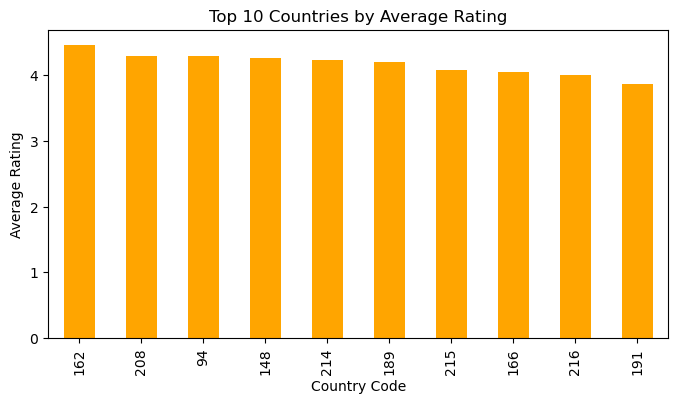

In [4]:
# Restaurant count by country
country_counts = df['Country Code'].value_counts().head(10)

print("Top 10 Countries by Restaurant Count:")
print(country_counts)

plt.figure(figsize=(8,4))
country_counts.plot(kind='bar', color='purple')
plt.title("Top 10 Countries by Number of Restaurants")
plt.xlabel("Country Code")
plt.ylabel("Number of Restaurants")
plt.show()

# Average rating by country
country_avg = df.groupby('Country Code')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

print("\nTop 10 Countries by Average Rating:")
print(country_avg)

plt.figure(figsize=(8,4))
country_avg.plot(kind='bar', color='orange')
plt.title("Top 10 Countries by Average Rating")
plt.xlabel("Country Code")
plt.ylabel("Average Rating")
plt.show()

Average Rating per Price Range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


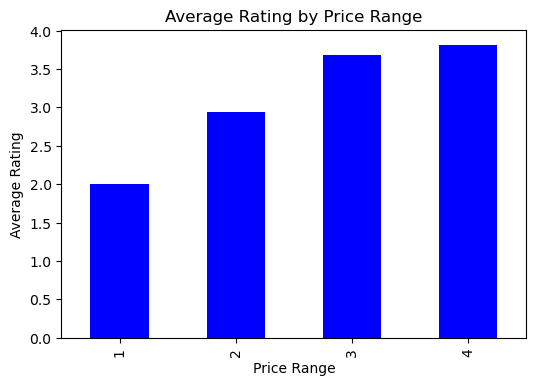

In [5]:
# Compare price range with average rating
price_vs_rating = df.groupby('Price range')['Aggregate rating'].mean()

print("Average Rating per Price Range:")
print(price_vs_rating)

plt.figure(figsize=(6,4))
price_vs_rating.plot(kind='bar', color='blue')
plt.title("Average Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.show()